# Project- Treadmill sales analysis

## A.i. Project Description
1. This project focuses on a prominent brand in the fitness equipment industry.
2. This brand offers a diverse range of products, including treadmills, exercise bikes, gym equipment, and fitness accessories.
3. The primary objective of this project is to ascertain the specific attributes of the target audience for every treadmill variant offered by the company.
4. The goal is to provide recommendations of the treadmills to new customers based on their identified characteristics.

## A.ii. Problem Statement:
Leveraging the customer data collected by Aerofit consisting of the Gender, Age, Income, Weekly Usage, Fitness, Marital Status and Miles run on treadmill to identify characteristics which make the customer buy a particular treadmill out of KP281, KP481 and KP781 in the increasing order of expenditures. Further providing recommendations of treadmill for future orders/customers based on their profile.

### Importing libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Loading the dataset


In [2]:
df1=pd.read_csv('treadmill.csv')
df=df1.copy()

# B. Data Exploration

#### 1. Shape of data
    a. There are 180 rows and 9 columns

In [3]:
df.shape

(180, 9)

#### 2. First-5 Rows

In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


#### 3. Last-5 Rows

In [5]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


#### 4. Name of Columns

In [6]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

#### 5. Checking duplicated rows
    a. No duplicate rows is present

In [7]:
df.loc[df.duplicated()]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


#### 6. Total number of elements in dataset

In [8]:
df.size

1620

#### 7. Dataset information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


#### 8. Statistical properties(Numerical data only)
    Rounding off all statistical parameters to 2 digits.

In [10]:
df.describe().round(2)

,Age,Education,Usage,Fitness,Income,Miles
count,180.00,180.00,180.00,180.00,180.00,180.00
mean,28.79,15.57,3.46,3.31,53719.58,103.19
std,6.94,1.62,1.08,0.96,16506.68,51.86
min,18.00,12.00,2.00,1.00,29562.00,21.00
25%,24.00,14.00,3.00,3.00,44058.75,66.00
50%,26.00,16.00,3.00,3.00,50596.50,94.00
75%,33.00,16.00,4.00,4.00,58668.00,114.75
max,50.00,21.00,7.00,5.00,104581.00,360.00


#### 9. Statistical properties(Object data only)
    Rounding off all statistical parameters to 2 digits.

In [11]:
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


#### Data Exploration Insights:

A. Product 
   1. There are no missing values in any of the columns.
   2. There total 180 products of 3 different product types.
   3. Product KP-281 is the most purchased product.

B. Age:
   1. Minimum age & Maximum age of the person is 18 and 50 respectively.
   2. Mean age(28.79) is greater than Median age (26.00) which indicates  that the distribution of age values is skewed to the right(positively skewed).
   3. 75% of the persons have less than or equal to 33 years.

C. Gender:
   1. Out of 180 persons, 104 are Males and rest are females.

D. Education:
   1. Median value is 16.00, which indicates that half of the indivdiuals in the dataset have an education level equal to or below 16 years.
   2. Majority of the individuals (50-75%) have 14-16 years of education.

E. Marital Status:
   1. More partnered persons are there in the datset.

F. Usage:
   1. On an average 3-4 times the customer plans to use the treadmill each week.

G. Fitness:
   1. Individuals have rated their average fitness in range of between 3 to 4 on 1-to-5 scale.

H. Income:
   1. Mean income is greater than Median income which indicates  that the distribution of income is skewed to the right(positively skewed).
   2. Standard deviation for Income very high which indicates about some outliers.

I. Miles:
   1. 50 % of the individuals expects 94 miles to walk/run each week.
   2. Standard deviation for miles is high indicating certain outliers

#### 10. Number of Unique values in each column

In [12]:
for i in df.columns:
    print(i,':',df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


#### Observation: 
In can be concluded that only Age, Income, Miles can be considered as Continuous, the rest of the columns though integers/floats should be considered as categories.

### C.i. Univariate Analysis- Plotting continous Variables

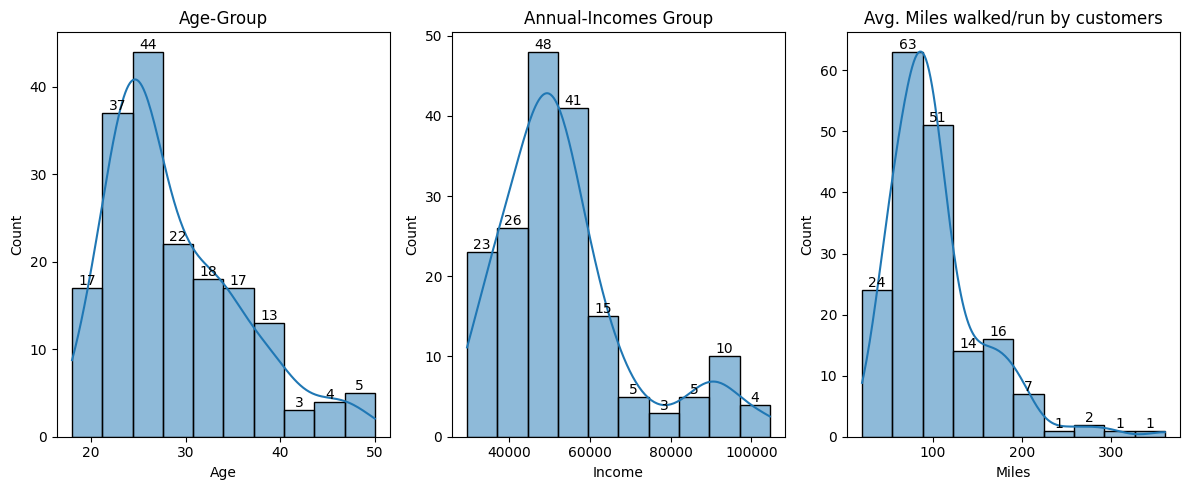

In [13]:
categories=['Age','Income','Miles']
titles=['Age-Group','Annual-Incomes Group','Avg. Miles walked/run by customers']
fig,axes=plt.subplots(1,3,figsize=(12,5))
for category, title, ax in zip(categories, titles, axes.flatten()):
    sns.histplot(data=df, x=category, ax=ax, bins=10, kde=True)
    ax.bar_label(ax.containers[1])
    ax.set_title(title)
plt.tight_layout()
plt.show()

### C.ii. Univariate Analysis- Plotting categorical Variables

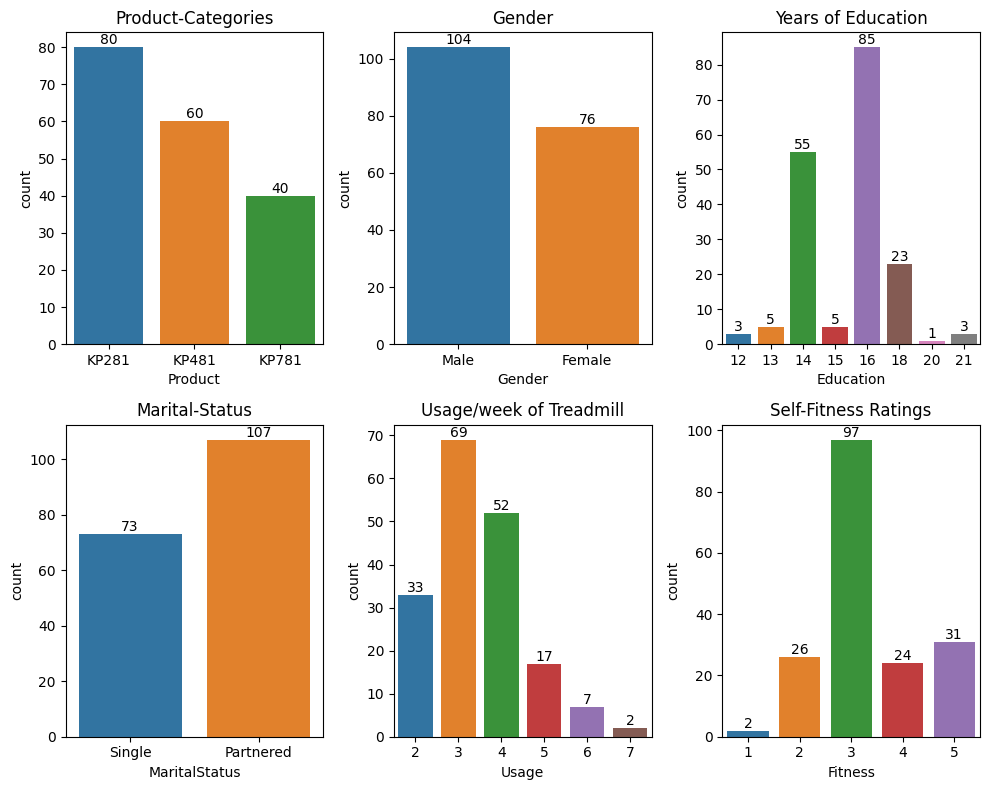

In [14]:
categories = ['Product', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness']
titles = ['Product-Categories','Gender','Years of Education','Marital-Status',
          'Usage/week of Treadmill','Self-Fitness Ratings']

fig, axes = plt.subplots(2, 3, figsize=(10, 8))

for category, title, ax in zip(categories, titles, axes.flatten()):
    sns.countplot(data=df, x=category, ax=ax)
    ax.bar_label(ax.containers[0])
    ax.set_title(title)
plt.tight_layout()
plt.show()

### D. Exploring Outliers

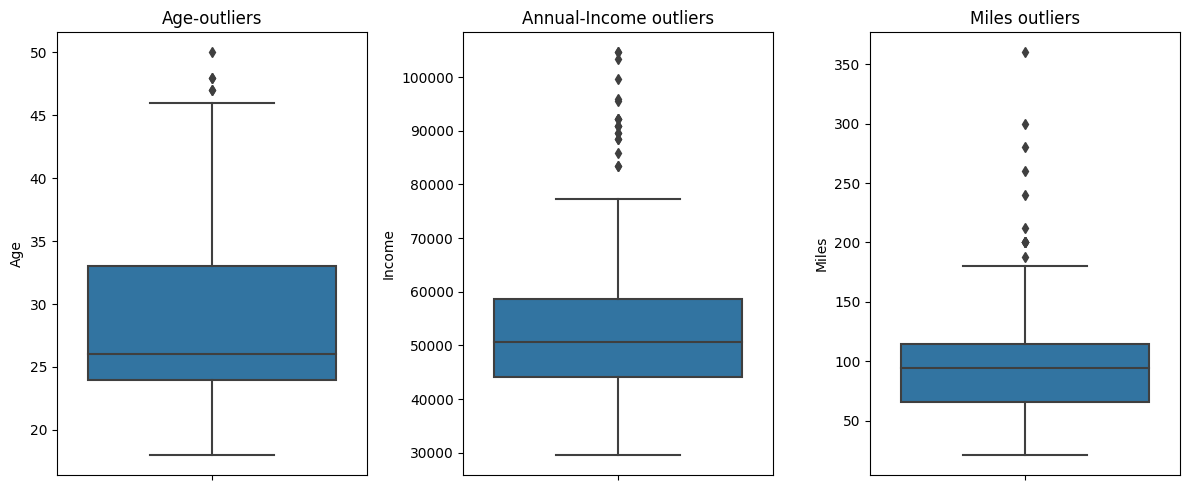

In [15]:
categories=['Age','Income','Miles']
titles=['Age-outliers','Annual-Income outliers','Miles outliers']
fig,axes=plt.subplots(1,3,figsize=(12,5))
for category, title, ax in zip(categories, titles, axes.flatten()):
    sns.boxplot(data=df, y=category, ax=ax)
    ax.set_title(title)
plt.tight_layout()
plt.show()

Certainly there are outliers in our data. When we remove them, this leads to loss of information and moreover we have a very small dataset of 180 rows. So instead of removing, it's going to be clipped (i.e. - ranges between 5 percentile and 95 percentile).

P.S. - The outlier treatment is demonstrated in the below piece of code for the copy of dataframe but it is not incorporated in the below analysis since these three numerical columns are binned and then analyzed.

In [16]:
num_feat=['Age', 'Income', 'Miles']
df_copy=df.copy()
for col in num_feat:
    percentiles = df[col].quantile([0.05,0.95]).values
    df_copy[col] = np.clip(df_copy[col], percentiles[0], percentiles[1])

In [17]:
df_copy[:5]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.0,Male,14,Single,3,4,34053.15,112
1,KP281,20.0,Male,15,Single,2,3,34053.15,75
2,KP281,20.0,Female,14,Partnered,4,3,34053.15,66
3,KP281,20.0,Male,12,Single,3,3,34053.15,85
4,KP281,20.0,Male,13,Partnered,4,2,35247.00,47


## E. Correlation Plot

#### Creating a copy of dataframe and converting 'Gender', 'MaritalStatus','Product' into numerical valeus. 
#### Creating a heamp to vissualize the correlation martix between the columns of dataframe

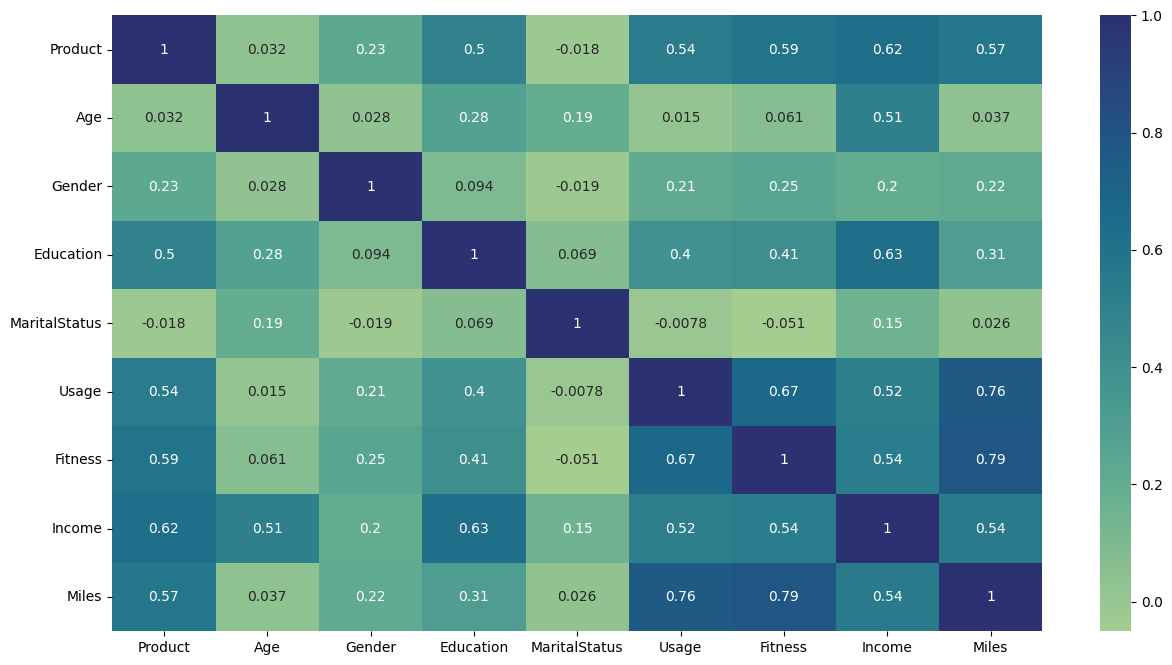

In [18]:
df2=df.copy()
df2['Gender'].replace(['Male', 'Female'], [1, 0], inplace=True)
df2['MaritalStatus'].replace(['Single', 'Partnered'], [0, 1], inplace=True)
df2['Product'].replace(['KP281', 'KP481', 'KP781'], [0, 1, 2], inplace=True)
plt.figure(figsize=(15,8))
sns.heatmap(df2.corr(),annot=True,cmap='crest')
plt.show()

In [19]:
df2.corr()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,1.000000,0.032225,0.230653,0.495018,-0.017602,0.537447,0.594883,0.624168,0.571596
Age,0.032225,1.000000,0.027544,0.280496,0.192152,0.015064,0.061105,0.513414,0.036618
Gender,0.230653,0.027544,1.000000,0.094089,-0.018836,0.214424,0.254609,0.202053,0.217869
Education,0.495018,0.280496,0.094089,1.000000,0.068569,0.395155,0.410581,0.625827,0.307284
MaritalStatus,-0.017602,0.192152,-0.018836,0.068569,1.000000,-0.007786,-0.050751,0.150293,0.025639
Usage,0.537447,0.015064,0.214424,0.395155,-0.007786,1.000000,0.668606,0.519537,0.759130
Fitness,0.594883,0.061105,0.254609,0.410581,-0.050751,0.668606,1.000000,0.535005,0.785702
Income,0.624168,0.513414,0.202053,0.625827,0.150293,0.519537,0.535005,1.000000,0.543473
Miles,0.571596,0.036618,0.217869,0.307284,0.025639,0.759130,0.785702,0.543473,1.000000


**Insights**
1) The choice of treadmill product exhibits significant correlations with various factors, including education, income, usage patterns, fitness levels, and total miles covered.
2) Age demonstrates a logical correlation with income (0.51), aligning with expectations. Additionally, age is correlated with education and marital status, indicating a coherent relationship.

3) Gender displays noticeable correlations with usage frequency, fitness levels, income, and total miles covered.

4) Education is correlated with both age and miles, exhibiting a high correlation with income, as anticipated. Moreover, there is a meaningful correlation with usage frequency and fitness levels.

5) Marital status exhibits correlations with income and age, in line with expectations

6) Usage frequency shows an exceptionally strong correlation with fitness levels and total miles covered, with a notable connection to income.

7) Fitness levels display a substantial correlation with income.
    
**Further Observations and Possibilities:-**

1) The product, fitness levels, usage frequency, and total miles covered demonstrate exceptionally strong intercorrelations, suggesting that increased product usage leads to higher fitness levels and more miles covered.

2) Also a story which seems reasonable is that Age and Education (predominately) are indicators of Income which affects the products bought. The more advanced the product is, the more its usage and hence more the miles run which in turns improves the fitness. 

Note:- Above point 2 is just something which may or mayn't be true as **Correlation doesn't imply Causation**.
    

### Relationship between 'Age', 'Income', & 'Miles'

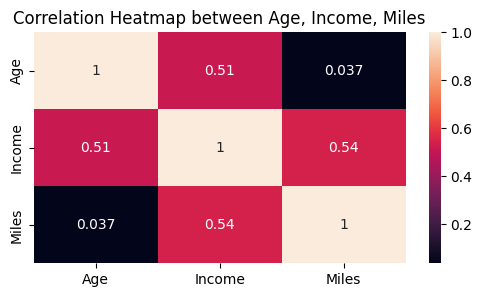

In [203]:
plt.figure(figsize=(6,3))
corr_matrix = df[['Age','Income','Miles']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap between Age, Income, Miles')
plt.show()

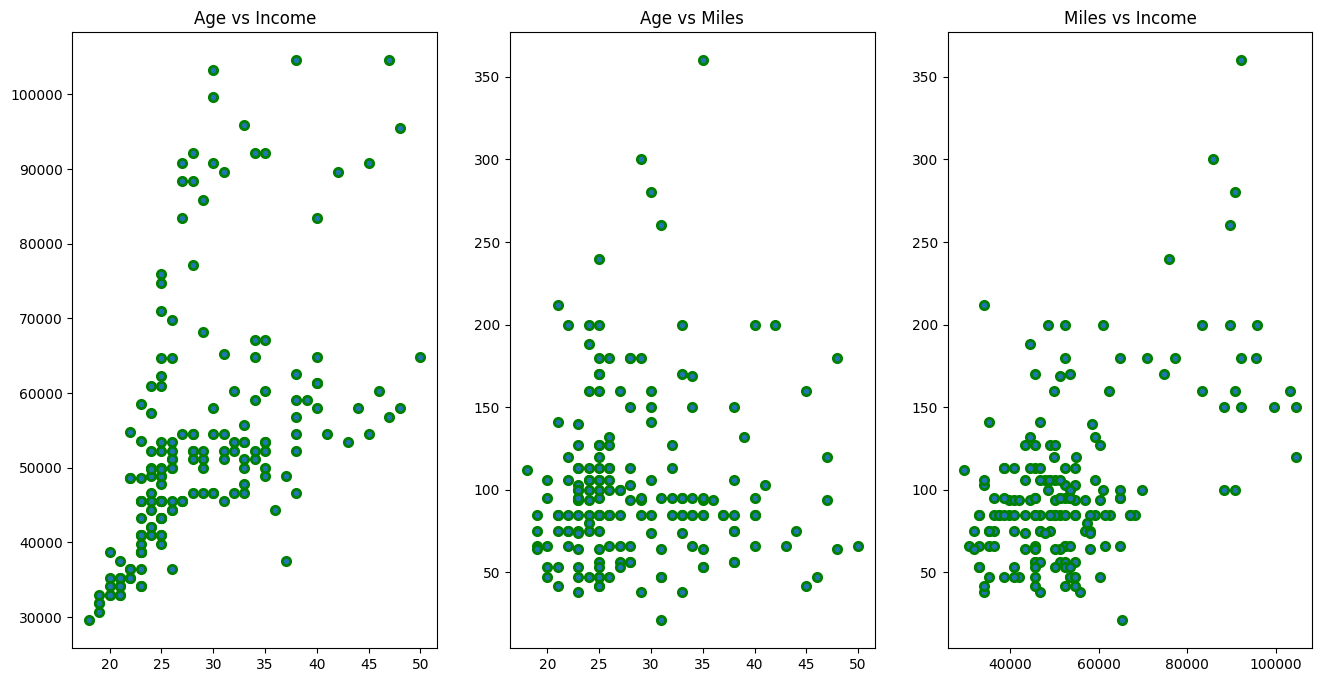

In [21]:
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.scatter(df['Age'],df['Income'],
            linewidths=2, marker='o', edgecolor='green')
plt.title('Age vs Income')
plt.subplot(1,3,2)
plt.scatter(df['Age'],df['Miles'],
            linewidths=2, marker='o', edgecolor='green')
plt.title('Age vs Miles')
plt.subplot(1,3,3)
plt.scatter(df['Income'],df['Miles'],
            linewidths=2, marker='o', edgecolor='green')
plt.title('Miles vs Income')
plt.show()

#### Insights:
1. The variance of income in lower ages is smaller as compared to the variance in higher ages, probably something called as **Heteroscadasticity**.
2. No significant pattern or observation between Age and Miles run on a treadmill, also implied by heatmap with a correlation of 0.037.
3. The miles run on treadmill increase significantly with income, infact only people having incomes above 70000 have run over 220 miles. Moreover there's also a **Heteroscadastic** effect.

# F. Bivariate-Analysis
**Section A:**
Computing average usage, income, age, fitness, miles, Education for each product type purchased.

**Section-B:**
Checking if features like Gender, Education, Marital Status, Usage, Fitness, Age, Income, Miles have any effect on the product-purchased

### Section-1

#### 1. Average usage of each Product type by the customer

In [86]:
df.groupby('Product')['Usage'].mean().round(2)

Product
KP281    3.09
KP481    3.07
KP781    4.78
Name: Usage, dtype: float64

a. Mean usage for product KP281 is 3.09

b. Mean usage for product KP481 is 3.07

c. Mean usage for product KP781 is 4.78

#### 2. Average age of customer using each Product

In [184]:
df.groupby('Product')['Age'].mean().round(2)

Product
KP281    28.55
KP481    28.90
KP781    29.10
Name: Age, dtype: float64

a. Mean Age of the customer who purchased product KP281 is 28.55

b. Mean Age of the customer who purchased product KP481 is 28.90

c. Mean Age of the customer who purchased product KP781 is 29.10

#### 3. Average customer fitness rating for each product type purchased

In [88]:
df.groupby('Product')['Fitness'].mean().round(2)

Product
KP281    2.96
KP481    2.90
KP781    4.62
Name: Fitness, dtype: float64

a. Customer fitness mean for product KP281 is 2.96

b. Customer fitness mean for product KP481 is 2.90

c. Customer fitness mean for product KP781 is 4.62

#### 4. Average Income of customer for each product type purchased

In [89]:
df.groupby('Product')['Income'].mean().round(2)

Product
KP281    46418.02
KP481    48973.65
KP781    75441.58
Name: Income, dtype: float64

a. Customer purchasing KP281 has mean income of 46418.02

b. Customer purchasing KP481 has mean income of 48973.65

c. Customer purchasing KP781 has mean income of 75441.58

#### 5. Average education of customer for each product type purchased

In [84]:
df.groupby('Product')['Education'].mean().round(2)

Product
KP281    15.04
KP481    15.12
KP781    17.32
Name: Education, dtype: float64

a. Customer purchasing KP281 has average education of 15.04

b. Customer purchasing KP481 has average education of 15.12

c. Customer purchasing KP781 has average education of 17.32

#### 6. Average Miles walked/run by customer for each product type purchased

In [90]:
df.groupby('Product')['Miles'].mean().round(2)

Product
KP281     82.79
KP481     87.93
KP781    166.90
Name: Miles, dtype: float64

a. Customers purchasing KP281 walk/run 82.79 Miles on an average scale.

b. Customers purchasing KP481 walk/run 87.93 Miles on an average scale.

c. Customers purchasing KP781 walk/run 166.90 Miles on an average scale.

### Section-2

In [63]:
df[['Age','Income','Miles']].describe()

,Age,Income,Miles
count,180.000000,180.000000,180.000000
mean,28.788889,53719.577778,103.194444
std,6.943498,16506.684226,51.863605
min,18.000000,29562.000000,21.000000
25%,24.000000,44058.750000,66.000000
50%,26.000000,50596.500000,94.000000
75%,33.000000,58668.000000,114.750000
max,50.000000,104581.000000,360.000000


#### Creating bins for 'Age', 'Income', Miles

In [64]:
bins=[-1,20,25,30,35,40,55]
labels=['<20','20-25','25-30','30-35','35-40','40+']
df['Age_bins']=pd.cut(df['Age'],bins=bins,labels=labels)
df[:5]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins,Mile_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,25-50K,100-150
1,KP281,19,Male,15,Single,2,3,31836,75,<20,25-50K,50-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,25-50K,50-100
3,KP281,19,Male,12,Single,3,3,32973,85,<20,25-50K,50-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,25-50K,<50


In [65]:
bins=[-1,25000,50000,75000,100000,125000]
labels=['<25K','25-50K','50-75K','75-100K','>100K']
df['Income_bins']=pd.cut(df['Income'],bins=bins,labels=labels)
df[:5]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins,Mile_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,25-50K,100-150
1,KP281,19,Male,15,Single,2,3,31836,75,<20,25-50K,50-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,25-50K,50-100
3,KP281,19,Male,12,Single,3,3,32973,85,<20,25-50K,50-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,25-50K,<50


In [66]:
bins=[-1,50,100,150,200,400]
labels=['<50','50-100','100-150','150-200','200+']
df['Mile_bins']=pd.cut(df['Miles'],bins=bins,labels=labels)
df[:5]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins,Mile_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,25-50K,100-150
1,KP281,19,Male,15,Single,2,3,31836,75,<20,25-50K,50-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,25-50K,50-100
3,KP281,19,Male,12,Single,3,3,32973,85,<20,25-50K,50-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,25-50K,<50


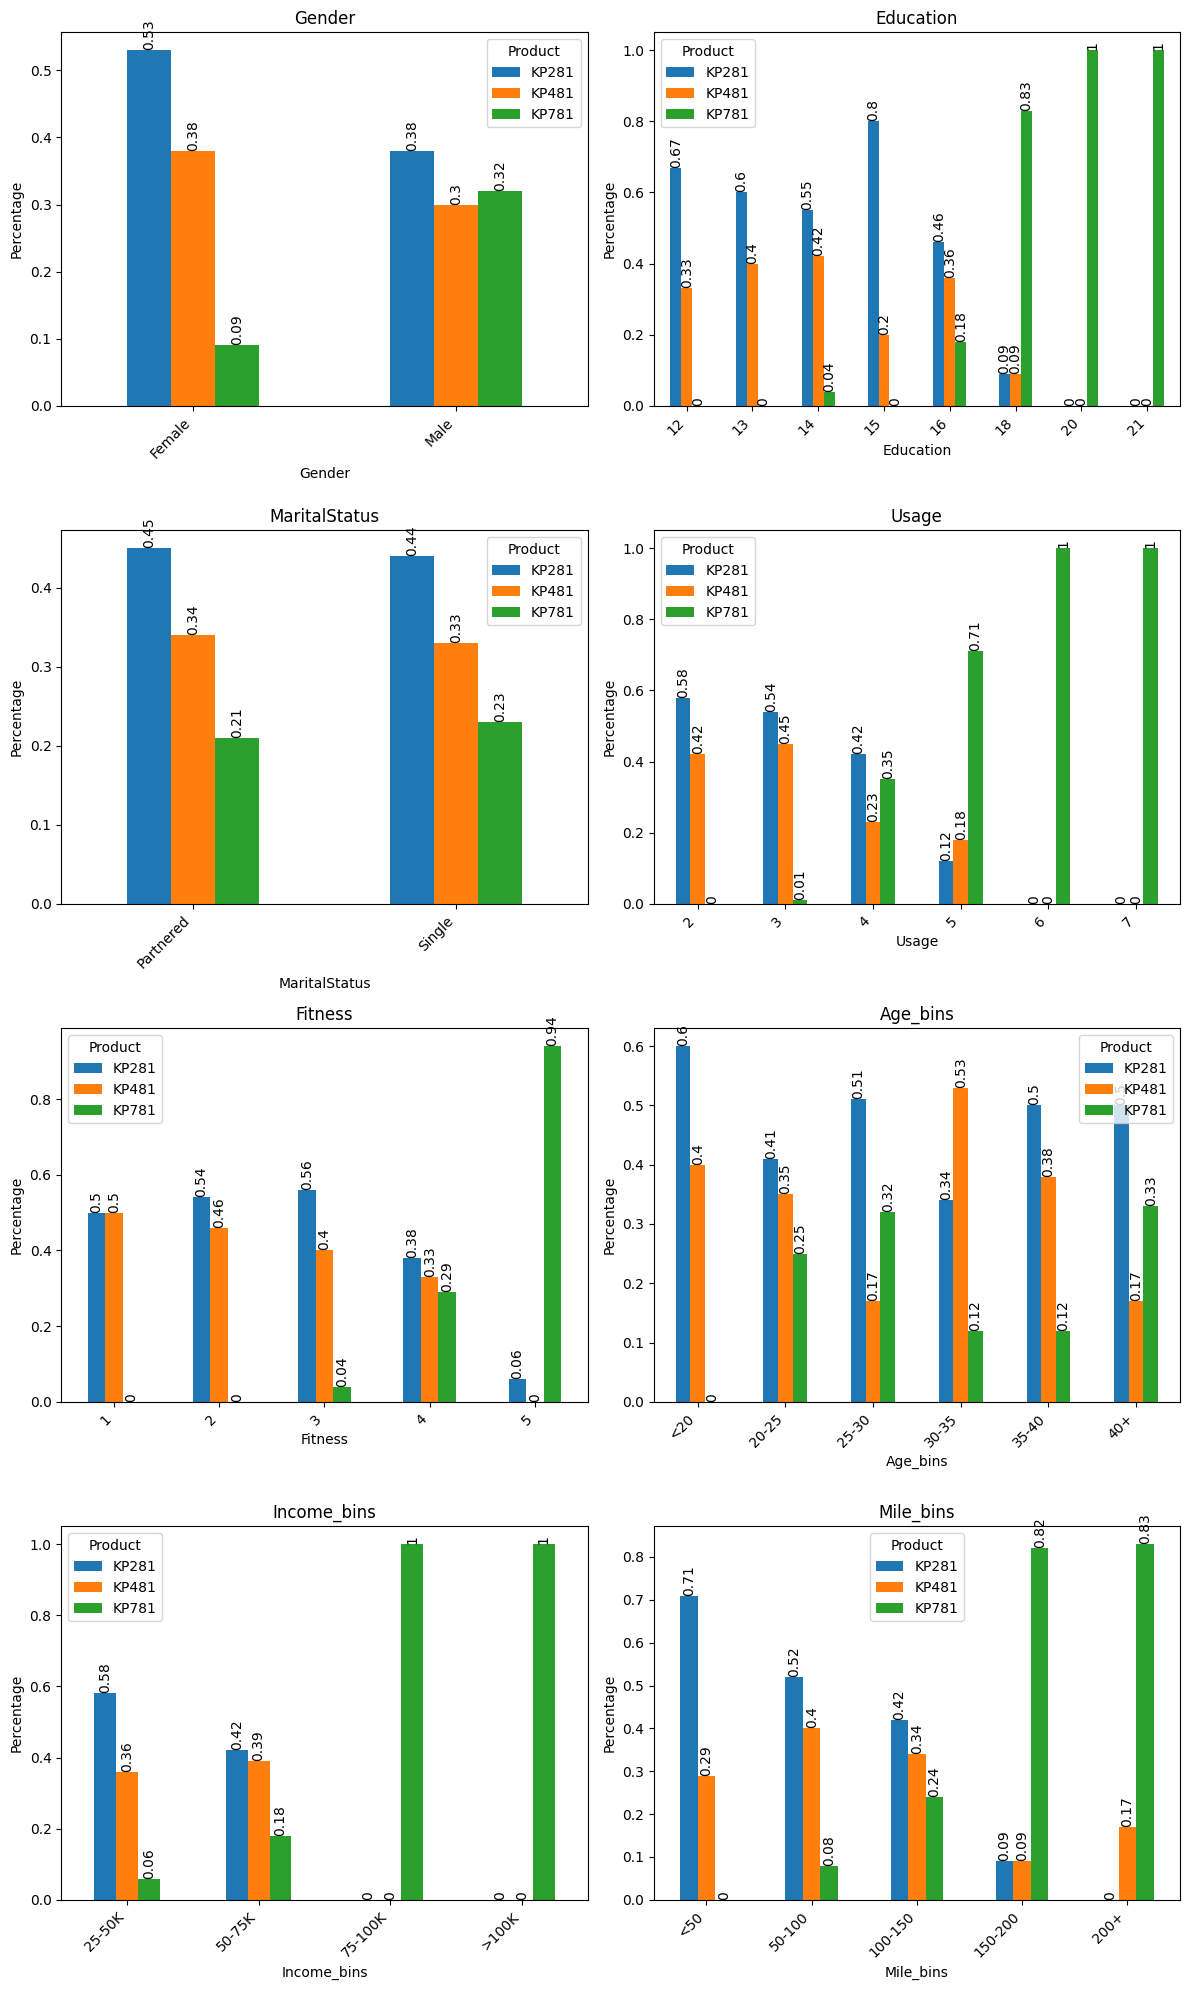

In [67]:
cat_cols=['Gender','Education', 'MaritalStatus', 'Usage','Fitness','Age_bins','Income_bins','Mile_bins']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 20))
axes=axes.flatten()
for i,cat_col in enumerate(cat_cols):
    curve=round(pd.crosstab(columns=df['Product'],index=df[cat_col],normalize='index'),2)
    ax=curve.plot(kind='bar',title=cat_col,ax=axes[i])
    for container in ax.containers:
        ax.bar_label(container, rotation=90)
        ax.set_ylabel('Percentage')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        plt.tight_layout()
plt.show()

## Insights

**Observations on the basis of above Categorical Plots**

A. Product and Gender comparison:
1) Around 53% of Women prefer KP281 and only 9% prefer KP781. While round 32% of Men prefer KP781. 

B. Product and Education:
1) The education level of 18 is associated with 80% preference for KP781, and all individuals with education levels of 20 or 21 use KP781. Conversely, no one with an education level below 14 uses KP781.

C. Product and Marital Status:
1) Marital status does not appear to provide significant insights into the usage patterns of different treadmills.

D. Product and Usage:
1) Those who work out 6 or 7 days a week use KP781 while 71% of those who work out 5 days a week use KP781. i.e., Customers planning to use the treadmill more than 4 times a week are more inclined to purchase the KP781 product.
2) Customers planning to use the treadmill less than 4 times a week show a higher tendency to buy either the KP-281 or KP-481 product.

E. Product and Fitness:
1) 94% of customers having fitness level of 5 use KP781 and none of those having fitness level below 3 use KP781.
2) Customers with lower fitness levels show a preference for either the KP281 or KP481 product.

F. Product and Age_bins:
1) No one below the age of 20 use KP781.

G. Product and Income_bins:
1) Customers with an income above 75K exclusively prefer KP781.
2) Customers with income range of 50-75K have similar preference of either KP281 or KP481.

H. Product and Miles_bins:
1) Customers who run over 150 Miles exhibit a strong preference for KP781. 
2) Customers who run less than 150 Mies chooses either KP281 or KP481.
3) The usage of KP281 decreases as mileage increases, while the preference for KP781 rises with higher mileage.



# G. Probabilities-

**Conditional probabilities** - are the probability that an event occurs given that another event has occurred.

Ex- Given that a customer is female, what is the probability she’ll purchase a KP281?

**Marginal Probablities** - Divide the row or column total by the total sample size. Marginal probabilities are the probabilities that a single event occurs with no regard to other events in the table. These probabilities do not depend on the condition of another outcome. 

Ex- Probability(Female)

**Normalize**: Default value is False Normalize by dividing all values by the sum of values:

If passed ‘all’ or True, will normalize over all values.

If passed ‘index’ will normalize over each row.

If passed ‘columns’ will normalize over each column.

If margins is True, will also normalize margin values.

#### Case-1

In [68]:
pd.crosstab(index=df['Gender'],columns=df['Product']).round(2)

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


#### Case-2
Row and Column totals is displayed when margins is True

In [69]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


#### Case-3
Each elements is divided by total number of elements (i.e. 180)

In [70]:
(pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize=True)*100).round(2)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.22,16.11,3.89,42.22
Male,22.22,17.22,18.33,57.78
All,44.44,33.33,22.22,100.00


#### Case-4
When normalize='index', it will normalize over each row (i.e. Each element is divided by summation of individual rows)

In [71]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize='index').round(2)

Product,KP281,KP481,KP781
Gender,,,
Female,0.53,0.38,0.09
Male,0.38,0.30,0.32
All,0.44,0.33,0.22


#### Case-5
When normalize='columns', it will normalize over each column
i.e. Each element is divided by summation of individual columns

In [72]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize='columns').round(2)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.5,0.48,0.18,0.42
Male,0.5,0.52,0.82,0.58


## H. Conditional Probability

In [196]:
df_gender=pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True, normalize='index').round(2)

In [197]:
product_list = ['KP281', 'KP481', 'KP781']
gender_list = ['Male', 'Female']

for product in product_list:
    for gender in gender_list:
        probability = (df_gender[product][gender] / df_gender.loc[gender].sum())
        print(f'P({product}/{gender}) is: {probability:.2f}')
    print() 

P(KP281/Male) is: 0.38
P(KP281/Female) is: 0.53

P(KP481/Male) is: 0.30
P(KP481/Female) is: 0.38

P(KP781/Male) is: 0.32
P(KP781/Female) is: 0.09



In [34]:
df_status=pd.crosstab(index=df['MaritalStatus'],columns=df['Product'],margins=True, normalize='index').round(2)

In [35]:
product_list = ['KP281', 'KP481', 'KP781']
status_list = ['Single', 'Partnered']

for product in product_list:
    for status in status_list:
        probability = (df_status[product][status] / df_status.loc[status].sum())
        print(f'P({product}/{status}) is: {probability:.2f}')
    print()  

P(KP281/Single) is: 0.44
P(KP281/Partnered) is: 0.45

P(KP481/Single) is: 0.33
P(KP481/Partnered) is: 0.34

P(KP781/Single) is: 0.23
P(KP781/Partnered) is: 0.21



In [36]:
df_edu=pd.crosstab(index=df['Education'],columns=df['Product'],margins=True, normalize='index').round(2)

In [37]:
product_list = ['KP281', 'KP481', 'KP781']
edu_list = [12,13,14,15,16,18,20,21]

for product in product_list:
    for education in edu_list:
        probability = (df_edu[product][education] / df_edu.loc[education].sum())
        print(f'P({product}/{education}) is: {probability:.2f}')
    print()  

P(KP281/12) is: 0.67
P(KP281/13) is: 0.60
P(KP281/14) is: 0.54
P(KP281/15) is: 0.80
P(KP281/16) is: 0.46
P(KP281/18) is: 0.09
P(KP281/20) is: 0.00
P(KP281/21) is: 0.00

P(KP481/12) is: 0.33
P(KP481/13) is: 0.40
P(KP481/14) is: 0.42
P(KP481/15) is: 0.20
P(KP481/16) is: 0.36
P(KP481/18) is: 0.09
P(KP481/20) is: 0.00
P(KP481/21) is: 0.00

P(KP781/12) is: 0.00
P(KP781/13) is: 0.00
P(KP781/14) is: 0.04
P(KP781/15) is: 0.00
P(KP781/16) is: 0.18
P(KP781/18) is: 0.82
P(KP781/20) is: 1.00
P(KP781/21) is: 1.00



In [38]:
df_usage=pd.crosstab(index=df['Usage'],columns=df['Product'],margins=True, normalize='index').round(2)

In [39]:
product_list = ['KP281', 'KP481', 'KP781']
usage_list = [2,3,4,5,6,7]

for product in product_list:
    for usage in usage_list:
        probability = (df_usage[product][usage] / df_usage.loc[usage].sum())
        print(f'P({product}/{usage}) is: {probability:.2f}')
    print()  

P(KP281/2) is: 0.58
P(KP281/3) is: 0.54
P(KP281/4) is: 0.42
P(KP281/5) is: 0.12
P(KP281/6) is: 0.00
P(KP281/7) is: 0.00

P(KP481/2) is: 0.42
P(KP481/3) is: 0.45
P(KP481/4) is: 0.23
P(KP481/5) is: 0.18
P(KP481/6) is: 0.00
P(KP481/7) is: 0.00

P(KP781/2) is: 0.00
P(KP781/3) is: 0.01
P(KP781/4) is: 0.35
P(KP781/5) is: 0.70
P(KP781/6) is: 1.00
P(KP781/7) is: 1.00



In [40]:
df_fit=pd.crosstab(index=df['Fitness'],columns=df['Product'],margins=True, normalize='index').round(2)

In [41]:
product_list = ['KP281', 'KP481', 'KP781']
fitness_list = [1,2,3,4,5]

for product in product_list:
    for fit in fitness_list:
        probability = (df_fit[product][fit] / df_fit.loc[fit].sum())
        print(f'P({product}/{fit}) is: {probability:.2f}')
    print()  

P(KP281/1) is: 0.50
P(KP281/2) is: 0.54
P(KP281/3) is: 0.56
P(KP281/4) is: 0.38
P(KP281/5) is: 0.06

P(KP481/1) is: 0.50
P(KP481/2) is: 0.46
P(KP481/3) is: 0.40
P(KP481/4) is: 0.33
P(KP481/5) is: 0.00

P(KP781/1) is: 0.00
P(KP781/2) is: 0.00
P(KP781/3) is: 0.04
P(KP781/4) is: 0.29
P(KP781/5) is: 0.94



In [42]:
df_age=pd.crosstab(index=df['Age_bins'],columns=df['Product'],margins=True, normalize='index').round(2)

In [43]:
product_list = ['KP281', 'KP481', 'KP781']
age_list = ['<20','20-25','25-30','30-35','35-40','40+']

for product in product_list:
    for age in age_list:
        probability = (df_age[product][age] / df_age.loc[age].sum())
        print(f'P({product}/{age}) is: {probability:.2f}')
    print()  

P(KP281/<20) is: 0.60
P(KP281/20-25) is: 0.41
P(KP281/25-30) is: 0.51
P(KP281/30-35) is: 0.34
P(KP281/35-40) is: 0.50
P(KP281/40+) is: 0.50

P(KP481/<20) is: 0.40
P(KP481/20-25) is: 0.35
P(KP481/25-30) is: 0.17
P(KP481/30-35) is: 0.54
P(KP481/35-40) is: 0.38
P(KP481/40+) is: 0.17

P(KP781/<20) is: 0.00
P(KP781/20-25) is: 0.25
P(KP781/25-30) is: 0.32
P(KP781/30-35) is: 0.12
P(KP781/35-40) is: 0.12
P(KP781/40+) is: 0.33



In [44]:
df_income=pd.crosstab(index=df['Income_bins'],columns=df['Product'],margins=True, normalize='index').round(2)

In [45]:
product_list = ['KP281', 'KP481', 'KP781']
income_list = ['25-50K','50-75K','75-100K','>100K']

for product in product_list:
    for income in income_list:
        probability = (df_income[product][income] / df_income.loc[income].sum())
        print(f'P({product}/{income}) is: {probability:.2f}')
    print()  

P(KP281/25-50K) is: 0.58
P(KP281/50-75K) is: 0.42
P(KP281/75-100K) is: 0.00
P(KP281/>100K) is: 0.00

P(KP481/25-50K) is: 0.36
P(KP481/50-75K) is: 0.39
P(KP481/75-100K) is: 0.00
P(KP481/>100K) is: 0.00

P(KP781/25-50K) is: 0.06
P(KP781/50-75K) is: 0.18
P(KP781/75-100K) is: 1.00
P(KP781/>100K) is: 1.00



In [46]:
df_mile=pd.crosstab(index=df['Mile_bins'],columns=df['Product'],margins=True, normalize='index').round(2)

In [47]:
product_list = ['KP281', 'KP481', 'KP781']
mile_list = ['<50','50-100','100-150','150-200','200+']

for product in product_list:
    for miles in mile_list:
        probability = (df_mile[product][miles] / df_mile.loc[miles].sum())
        print(f'P({product}/{miles}) is: {probability:.2f}')
    print()  

P(KP281/<50) is: 0.71
P(KP281/50-100) is: 0.52
P(KP281/100-150) is: 0.42
P(KP281/150-200) is: 0.09
P(KP281/200+) is: 0.00

P(KP481/<50) is: 0.29
P(KP481/50-100) is: 0.40
P(KP481/100-150) is: 0.34
P(KP481/150-200) is: 0.09
P(KP481/200+) is: 0.17

P(KP781/<50) is: 0.00
P(KP781/50-100) is: 0.08
P(KP781/100-150) is: 0.24
P(KP781/150-200) is: 0.82
P(KP781/200+) is: 0.83



# Insights

**A. About Products:**
1. There are 3-different type of treadmills offered by the brand. 
2. 44.44% of the customers purchased KP281 Product.
3. 33.33% of the customers purchased KP481 Product.
4. 22.22% of the customers purchased KP781 Product

**B. Product preference based on Age:**
1. P(KP281/Age<20)   --->60%
60% of the customer who purchase KP281 aged less than 20 years.
2. P(KP481/Age 30-35)--->53%
3. Customers aged less than 20years never purchased KP781.

**C. Product preference based on Education:**
1. P(KP281/Education=12) --->67%
2. P(KP781/ Education=18)---> 83%
2. P(KP781/Education>=20)--->100%

**D. Product Preference based on Gender:**
1. There is 38%, 30%, 32% probability that Male customers prefer to buy KP281, KP481 and KP781 respectively.
2. There is 53%, 38%, 9% probability that Female customers prefer to buy KP281, KP481 and KP781 respectively.
3. Majority of customers who purchased the KP781 product are Males.

**E. Product Prefernce based on Marital Status:**
1. There is 44%, 33%, 23% probability that customers who are single prefer to buy KP281, KP481 and KP781 respectively.
2. There is 45%, 34%, 21% probability that Partnered customers prefer to buy KP281, KP481 and KP781 respectively.

**F. Product preference based on Treadmill usage:**
1. P(KP781/Usage>=6) ---> 100%
2. P(KP281/Usage=2)  ---> 58%

**G. Product preference based on Income range:**
1. P(KP781/Income>75K) ---> 100%
2. P(KP281/ Income 25-250K) --->58%

**H. Product preference based on Miles walk/run:**
1. P(KP781/Miles_bin>150) ---> 82%
2. P(KP281/Miles_bin<50)  ---> 71%

**I. Product preference based on self-fitness ratings:**
1. P(KP781/Fitness=5) --->94%

# I. Multi-variate Analysis

In [102]:
df[:5]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins,Mile_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,25-50K,100-150
1,KP281,19,Male,15,Single,2,3,31836,75,<20,25-50K,50-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,25-50K,50-100
3,KP281,19,Male,12,Single,3,3,32973,85,<20,25-50K,50-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,25-50K,<50


#### 1. Product preference on basis of Age & Income

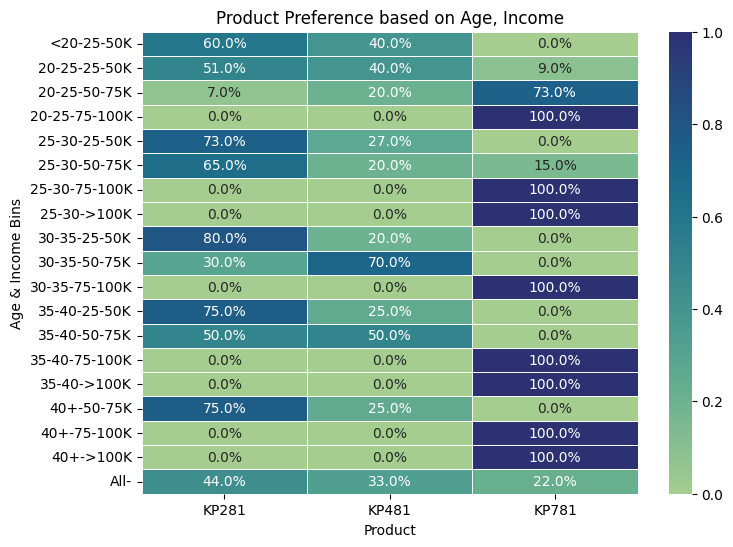

In [199]:
cross_tab_result = pd.crosstab(index=[df['Age_bins'], df['Income_bins']], columns=df['Product'], margins=True, normalize='index').round(2)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab_result, annot=True, fmt=".1%", cbar=True, linewidth=0.5, cmap='crest')
plt.title('Product Preference based on Age, Income')
plt.xlabel('Product')
plt.ylabel('Age & Income Bins')
plt.show()

#### 2. Product preference on basis of Gender and MaritalStatus

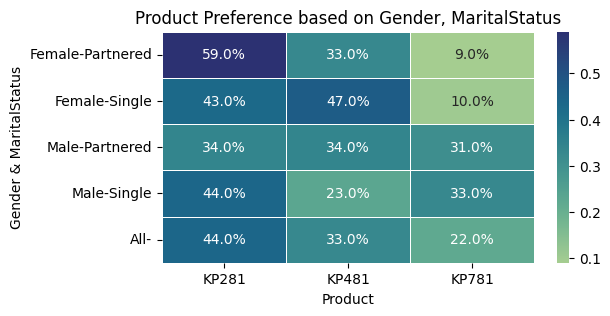

In [198]:
cross_tab_result = pd.crosstab(index=[df['Gender'], df['MaritalStatus']], columns=df['Product'], margins=True, normalize='index').round(2)

# Plotting
plt.figure(figsize=(6,3))
sns.heatmap(cross_tab_result, annot=True, fmt=".1%", cbar=True, linewidth=0.5, cmap='crest')
plt.title('Product Preference based on Gender, MaritalStatus')
plt.xlabel('Product')
plt.ylabel('Gender & MaritalStatus')
plt.show()

# J. Recommendations and Customer Profiling

## Customer Profiling for KP781:

**Probability of purchase: 22%**

**A.Demographics:**

* Gender: Male
* Age:
    * 20 years and above
    * Avg. age of KP781 customers: 29.10 years
* Education:
    * 16 years and above
    * Avg. education level of KP781 customers: 17.32 years

**B. Behavioral Traits:**

* Usage:
    * Weekly usage more than 4 times
    * Avg. weekly usage of KP781 customers: 4.78 times

* Fitness:
    * Self-fitness rating of 4 and above
    * Avg. self-fitness rating of KP781 customers: 4.62

* Income:
    * Annual income above USD 75K
    * Avg. annual income of KP781 customers: USD 75.42K

* Miles walked/run:
    * Weekly steps walked/run 100 Miles and above
    * Avg. weekly steps walked/run by KP781 customers: 166.90 Miles

## Customer Profiling for KP481:

**Probability of purchase: 33%**

**A.Demographics:**

* Age:
    * less than 40 years
    * Avg. age of KP781 customers: 28.90 years
* Education:
    * 12-16 years
    * Avg. education level of KP781 customers: 15.12 years

**B. Behavioral Traits:**

* Usage:
    * Weekly usage 2-4 times
    * Avg. weekly usage of KP781 customers: 3.07 times

* Fitness:
    * Self-fitness rating of 1-4
    * Avg. self-fitness rating of KP781 customers: 2.90

* Income:
    * Annual income between USD 25-75K
    * Avg. annual income of KP781 customers: USD 48.97K

* Miles walked/run:
    * Weekly steps walked/run between 50-150 Miles
    * Avg. weekly steps walked/run by KP781 customers: 87.93 Miles

## Customer Profiling for KP281:

**Probability of purchase: 44%**

**A.Demographics:**

* Age:
    * Variation in ages between 18 and 50 years
    * Avg. age of KP781 customers: 28.55 years
* Education:
    * 12-16 years
    * Avg. education level of KP781 customers: 15.04 years

**B. Behavioral Traits:**

* Usage:
    * Weekly usage 2-4 times
    * Avg. weekly usage of KP781 customers: 3.09 times

* Fitness:
    * Self-fitness rating of 1-4
    * Avg. self-fitness rating of KP781 customers: 2.96

* Income:
    * Annual income between USD 25-75K
    * Avg. annual income of KP781 customers: USD 46.42K

* Miles walked/run:
    * Weekly steps walked/run between 50-150 Miles
    * Avg. weekly steps walked/run by KP781 customers: 82.79 Miles

**Note for above mentioned points**
KP281 and KP481 don't have much differences in their costs and the characteristics of customers who use them . Still a few of them have been identified but they need to be validated with an incremental data.

## K. Recommendations:

**Marketing Campaigns for KP781**

* The KP781 model shows a substantial sales gap based on gender, with only 18% of total sales coming from female customers.
* To address this disparity and improve sales recommended strategies include offering special promotions and trials designed exclusively for female customers.
* As KP781 has enhanced features and functionalities, the treadmill should be marketed for professionals and athletes and may be promoted using Fitness influencer or other International Athletes.
* Target the age_group  above 40 years to recommend KP781 

**Promotion as Budget Treadmills**

* Customers with an annual income between 25K and 75K USD prefer KP281 and KP481 treadmills. 
* These models should be marketed and promoted as budget-friendly options.

**Research required for customers beyond 50 years**

* Research required for expanding market beyond 50 years of age considering health pros and cons.

**Affordable Payment/Installment Plans**
* consider providing flexible payment plans that allow customers to look for more advanced features treadmills.